In [14]:
import pandas as pd
profiledata = pd.read_csv('profiledata.csv')

In [15]:
#preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = word_tokenize(text)
    return tokens
profiledata['processed_about'] = profiledata['About'].apply(preprocess_text)


In [16]:
from collections import Counter

all_words = [word for item in profiledata['processed_about'] for word in item]
word_freq = Counter(all_words)


In [17]:
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

#stop words are words like and,or,the, all redundant words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]
word_freq = Counter(filtered_words)
df = pd.DataFrame(word_freq.items(), columns=['Words', 'Frequency'])
fig = px.bar(df, x='Words', y='Frequency', labels={'Frequency': 'Word Frequency'}, title='Word Frequency Visualization (without Stop Words)')
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
profiledata['Connections'] = profiledata['Connections'].str.replace('followers','').str.replace(',', '')


In [37]:
profiledata['Connections'] = profiledata['Connections'].astype(int)

In [49]:
profiledata[['Name','Job Title','Connections']]

,Name,Job Title,Connections
0,Daksh Patel,Business Development Manager,7
1,Daksh Patel,Student at The Maharaja Sayajirao University o...,125
2,Daksh Patel,Data Scientist | GDSC Tech Lead,301
3,Daksh Patel,Digital Product Designer,1814
4,Daksh Patel,"""Passionate Innovator | Driving Positive Chang...",83
5,Daksh Patel,JAVA DEVELOPER || CORE JAVA || Well Known ...,175
6,Daksh Patel,Associate software Engineer at Thomson Reuters,935
7,Daksh Patel,SDE @Jio ( DSA | JAVA | LLD | REACTJS | NODEJS...,2276
8,Daksh P.,no results,499
9,Daksh Patel,Director,226


In [69]:
profiledata['Location'] = profiledata['Location'].str.strip()

In [70]:
profiledata.head()

,Unnamed: 0,URL,Name,Job Title,Company,Location,About,Connections,processed_about
0,0,https://www.linkedin.com/in/daksh-patel-7b7732...,Daksh Patel,Business Development Manager,Logix Built Solutions Pvt Ltd,"Surat, Gujarat, India","Hello, I'm Daksh Patel, a results-oriented Bus...",7,"[hello, im, daksh, patel, a, resultsoriented, ..."
1,1,https://www.linkedin.com/in/daksh-patel-501702...,Daksh Patel,Student at The Maharaja Sayajirao University o...,The Maharaja Sayajirao University of Baroda,"Gujarat, India",no results,125,"[no, results]"
2,2,https://www.linkedin.com/in/daksh-patel-922ba5...,Daksh Patel,Data Scientist | GDSC Tech Lead,Google Developer Student Clubs,"Gandhinagar, Gujarat, India",Passionate about leveraging data to drive insi...,301,"[passionate, about, leveraging, data, to, driv..."
3,3,https://www.linkedin.com/in/daksh-patel-?miniP...,Daksh Patel,Digital Product Designer,SandCup Design Studio,"Ahmedabad, Gujarat, India",Creating mindful and intuitive human-centered ...,1814,"[creating, mindful, and, intuitive, humancente..."
4,4,https://www.linkedin.com/in/daksh-patel-aa8699...,Daksh Patel,"""Passionate Innovator | Driving Positive Chang...",Roma Industries,"Ahmedabad, Gujarat, India",Experienced Director with a demonstrated histo...,83,"[experienced, director, with, a, demonstrated,..."


In [71]:
profiledata.Location

0          Surat, Gujarat, India
1                 Gujarat, India
2    Gandhinagar, Gujarat, India
3      Ahmedabad, Gujarat, India
4      Ahmedabad, Gujarat, India
5    Gandhinagar, Gujarat, India
6      Ahmedabad, Gujarat, India
7      Ahmedabad, Gujarat, India
8                 Gujarat, India
9      Ahmedabad, Gujarat, India
Name: Location, dtype: object

In [79]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from opencage.geocoder import OpenCageGeocode

opencage_api_key = '2cec0d890de64c32b85ec3b2cf943edd'
geocoder = OpenCageGeocode(opencage_api_key)

locations = profiledata['Location']

In [80]:
# Geocode location names to get latitude and longitude
coordinates = []
for location in locations:
    result = geocoder.geocode(location)
    if result and 'geometry' in result[0]:
        lat, lng = result[0]['geometry']['lat'], result[0]['geometry']['lng']
        point = Point(lng, lat)  # Note: Point takes (x, y) which is (lng, lat)
        coordinates.append(point)
    else:
        coordinates.append(None)

C:\Users\hp\AppData\Local\Temp\ipykernel_13344\134642760.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



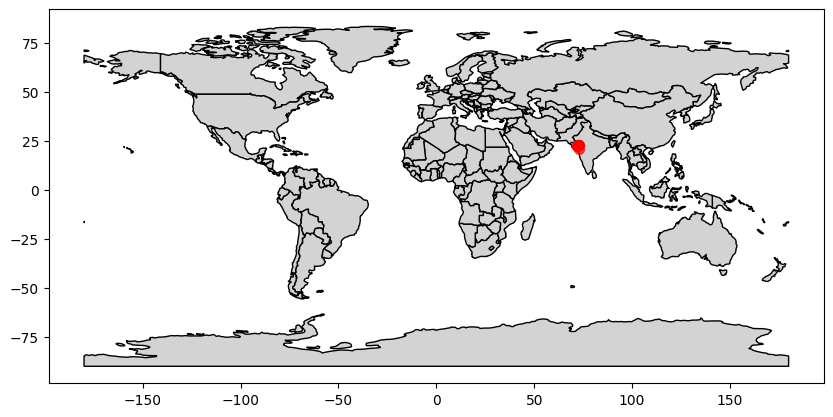

In [86]:

# GeoDataFrame with the coordinates
gdf = gpd.GeoDataFrame(geometry=coordinates)

# Plot the locations on a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.7)
plt.show()

In [82]:
final_data = profiledata.head()

In [83]:
final_data.to_csv('final_data.csv')